
# How to Leverage Data to Improve Your AirBnB Revenue Stream

## Based on Seattle AirBnB Listings 

Using the AirBnB listings open dataset from Kaggle, I wanted to explore a couple of questions that I would be asking myself if I were trying to start or improve my AirBnB business in the Seattle area.  Hopefully some of the none neighbourhood specific insights will also translate into other cities, but that will be the purpose of another project.  

BUSINESS UNDERSTANDING:

To start, we will explore some basic demographics of the listings, like what neighbourhoods can call the highest listing price? Or does it matter how many beds there are, or what type of listing it is? From there, we will move into some of the more host specific insights, like how do reviews or cancellation policies affect the overall occupancy rate of a listing?

Throughout this post, I will discuss the reasons I wanted to explore certain aspects of the data along with the code used to get the answers I wanted.  I'll go through some of the business applicatios of the findings, such that an AirBnB host will be able to look objectively at their listing and improve their overall occupancy rate. 

##### Data Disclaimers

- Although some listings have price's per week or per month, we will be looking exclusively at the per night price. 
- The Availability time frames (30/60/90/365 days) are not a perfect representation of how often a listing is rented as hosts don't necessarily have every day available.  A more accurate metric would be [Number of Bookings:Number of Listed 
Available Nights]

I only used pandas, numpy and matplotlib packages for this analysis.  There is certainly opportunity for more advanced methodology to be used with this dataset, but for a baseline these worked perfectly for me. 

## Listing Demographics

Before we dig into the listing specific insights, we're going to look at the different neighbourhoods and demographics of the dataset. We'll focus on the following questions:

1) Average price per neighbourhood  
2) Property/Room Type Statistics

While it's difficult to change your neighbourhood, or how much of your house/apartment you can share at one time, these questions will give potential AirBnB hosts how much they could expect to list their unit for by night.  

In [3]:
## Package and Data Imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_listings = pd.read_csv("listings.csv")

In [4]:
## A1 Section

# DF Manipulation

df_A = df_listings.loc[:, ['neighbourhood_group_cleansed', 'property_type', 'room_type', 'amenities', 'beds', 'price']]
df_A['price_per_bed'] = df_A['price'] / df_A['beds']

df_A1 = df_A[['neighbourhood_group_cleansed', 'beds', 'price', 'price_per_bed']]
df_A1 = df_A1.groupby('neighbourhood_group_cleansed').mean().reset_index()
df_A1 = df_A1.sort_values('price', ascending=False)
A1_neighbourhoods = df_A1.neighbourhood_group_cleansed.unique()

In [5]:
df_A1.describe()

,beds,price,price_per_bed
count,17.000000,17.000000,17.000000
mean,1.693336,119.838682,77.893617
std,0.268011,27.847598,16.390865
min,1.090909,83.278481,59.542803
25%,1.532628,93.639344,62.294864
50%,1.637500,119.968514,73.265704
75%,1.828499,140.101124,91.282321
max,2.262295,177.672131,103.301539


*To keep things clean, I'll be creating new DataFrames for each section and sub-question; format will be "df_##"

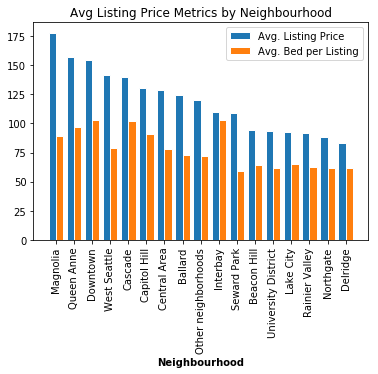

In [6]:
# Chart Building
barWidth = 0.4

bars1 = df_A1.price
bars2 = df_A1.price_per_bed

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='Avg. Listing Price')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='Avg. Bed per Listing')

plt.xlabel('Neighbourhood', fontweight='bold')
plt.xticks([r + (barWidth/2) for r in range(len(bars1))], A1_neighbourhoods, rotation='vertical')

plt.title('Avg Listing Price Metrics by Neighbourhood')
plt.legend()

plt.show()

#### Discussion: Average Price per Neighbourhood

Pretty clear cut rankings on which neighbourhoods are worth the most to an AirBnB host: 

1) Magnolia
2) Queen Anne
3) Downtown
4) West Seattle
5) Cascade

These neighbourhoods can offer the most revenue from a total listing perspective, but interestingly the relationship doesn't follow if you look at price per bed.  Downtown, Cascade and Interbay all have roughly the same price per bed, meaning if you have a larger house/apartment in those areas you may have a potentially lucrative spot.  

Another interesting thing to note is that Interbay neighbourhood has the lowest "Listing Price:Price per Bed" ratio, meaning that it is almost exclusively 1 bedroom listings in the area.  


In [7]:
## A2 Section

# Lists
roomtype = ['Entire Home/Apt', 'Private Room', 'Shared Room']
nbh = ['Magnolia', 'Queen Anne', 'Downtown', 'West Seattle', 'Cascade']
A2_results = []

#DF Manipulation
df_A2 = df_A[['neighbourhood_group_cleansed', 'room_type', 'price', 'price_per_bed']]
df_A2.set_index('neighbourhood_group_cleansed', inplace = True)
df_A2.loc[['Magnolia', 'Queen Anne', 'Downtown', 'West Seattle', 'Cascade']]

for i in (nbh): 
    #print(df_A2.loc[i].groupby('room_type').mean())
    A2_results.append(df_A2.loc[i].groupby('room_type').mean())

In [8]:
df_A2.describe()

,price,price_per_bed
count,3818.000000,3817.000000
mean,127.976166,81.543773
std,90.250022,45.355097
min,20.000000,4.750000
25%,75.000000,50.000000
50%,100.000000,72.500000
75%,150.000000,100.000000
max,1000.000000,999.000000


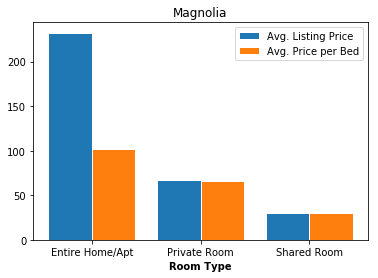

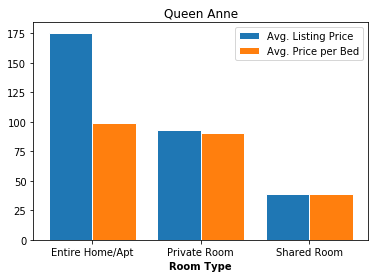

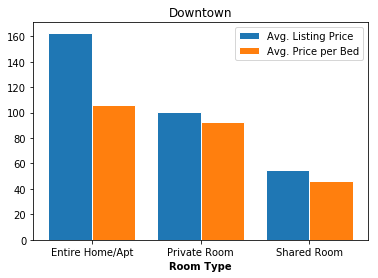

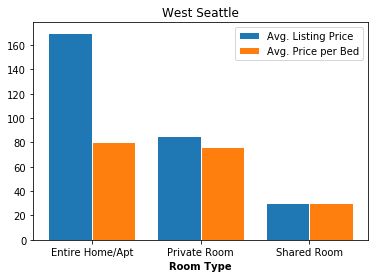

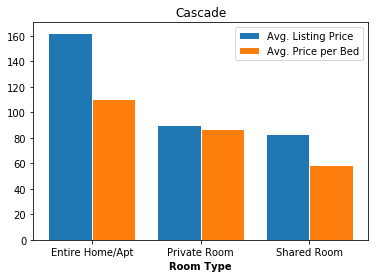

In [11]:
# Chart Building
for i, t in zip(range(5), nbh):

    bars1 = A2_results[i].iloc[:, 0]
    bars2 = A2_results[i].iloc[:, 1]
    
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='Avg. Listing Price')
    plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='Avg. Price per Bed')

    plt.xlabel('Room Type', fontweight='bold')
    plt.xticks([r + (barWidth/2) for r in range(len(bars1))], roomtype)
    
    plt.title(t)
    plt.legend()
    
    plt.show()

#### Discussion: Property and Room Type Statistics

In hindsight, this seems pretty obvious: Private Rooms and Shared Rooms will almost exclusively have 1 bed, making the Listing Price and Price per Bed roughly the same.  What this does offer, though, is a deeper look at the Entire Home/Apt listing type. 

It appears the largest houses (in terms of beds per unit) are coming from Magnolia and West Seattle, where there is at least a 2x difference between Listing Price and Price per Bed.  Interestingly, while these neighbourhoods offer the highest revenue potential for an entire house, they have some of the lowest Private Room and Shared Room listing prices, meaning hosts that are willing to offer their entire house are more likely to have a higher revenue stream. 

## "Pipeline" Improvements: How to Increase Chances of Getting Bookings

I wanted to explore some of the attributes a host would have more control over (cancellation policy and number of reviews) and how those attributes affect the pipeline of a listing.  

Pipeline here refers to how many nights are coming up in the next 30/60/90 days that you have a booking for.  When starting out as an AirBnB host, it may be difficult to know how many nights to expect, but over time you may hope to a better understanding of how many bookings are coming your way.  That means less worry for you as a host, and more revenue coming through your listing.  

Two main issues come up when doing this type of analysis with the AirBnB data:

1) The availability data only looks at how many nights are available to be booked in the next 30 days.  This could be as a result of already being booked (our null hypothesis) OR it could just be that the host has decided to not offer than night as bookable.  Not everyone is using AirBnB full time, and may only list their house when they go on vacation or for part of the week.  For this analysis, I assumed that it is the former, but it would be interesting to look at how many nights are booked compared to how many were offered as a better metric here. 

2) The calendar availabilty metrics aren't up to date for every listing; Some haven't been updated in a number of weeks! This presents an issue of null data, as a 6 week old calendar is going to say that everything in the next 30 days if available.  To counter this, I only looked at the listings where the availability calendar was updated within the last week; that filter still gave us ~50% of the total listings.  


First we'll look at the number of reviews a listing has, and if that has any affect on the occupancy pipeline. Then we'll look at the cancellation policy and if that makes users less likely to book further in advance. 

In [10]:
## B2 Section

# DF Manipulation
df_B = df_listings.loc[:, ['calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
                     'number_of_reviews', 'cancellation_policy']]

# Isolating Listings that have availability calendars updated within the last week
df_B.calendar_updated.unique()
B_list1 = ['never', 'today', 'yesterday', '2 days ago', '3 days ago', '4 days ago', '5 days ago', 
            '6 days ago', 'a week ago', '1 week ago', '2 weeks ago', '3 weeks ago', '4 weeks ago', 
            '5 weeks ago', '6 weeks ago', '7 weeks ago', '2 months ago', '3 months ago', '4 months ago', 
            '5 months ago', '6 months ago', '7 months ago', '8 months ago', '9 months ago', '10 months ago', 
            '11 months ago', '12 months ago', '13 months ago', '14 months ago', '15 months ago', '16 months ago', 
            '17 months ago', '22 months ago', '30 months ago']
B_list2 = list(range(-1, 33))
B_dict = dict(zip(B_list1, B_list2))
df_B.replace({"calendar_updated": B_dict}, inplace=True)
df_B = df_B.loc[(df_B['calendar_updated'] >= 0) & (df_B['calendar_updated'] <= 7)]
df_B = df_B.loc[(df_B['number_of_reviews'] > 0)]

df_B = df_B.sort_values('number_of_reviews', ascending=False)

# Determine Occupancy Rates for each time period
df_B['Occ_Rate_30'] = 1 - (df_B['availability_30'] / 30)
df_B['Occ_Rate_60'] = 1 - (df_B['availability_60'] / 60)
df_B['Occ_Rate_90'] = 1 - (df_B['availability_90'] / 90)
df_B['Occ_Rate_365'] = 1 - (df_B['availability_365'] / 365)

# Group Occupanacy Rates by # of Reviews Buckets
bucket = np.array([0, 1, 5, 10, 25, 50 , 75, 100, 125, 150, 200, 250, 300, 400, 500])
df_B1 = df_B.copy()
df_B1['review_bucket'] = pd.cut(df_B1.number_of_reviews, bins=bucket)
df_B1.drop(['calendar_updated', 'availability_30', 'availability_60', 'availability_90', 
            'availability_365', 'cancellation_policy', 'number_of_reviews'], axis='columns', inplace=True)
df_B1 = df_B1.groupby('review_bucket').mean().reset_index()

*There is some additional maniuplation that has to happen in the above cell to make the model work. 

1) I convert the categorical "calendar_update" value from text to numerical with a dictionary.  This not only let's me filter the dimension better, but also creates a chronological sorting logic. 

2) I need to bucket listings by the number of reviews they have.  This cleans up the output and groups listings into smaller buckets.  

In [18]:
df_B1.head(15)

,review_bucket,Occ_Rate_30,Occ_Rate_60,Occ_Rate_90,Occ_Rate_365
0,"(0, 1]",0.449074,0.405864,0.393107,0.424734
1,"(1, 5]",0.444361,0.393672,0.358939,0.370522
2,"(5, 10]",0.450441,0.378395,0.337978,0.299051
3,"(10, 25]",0.409222,0.331176,0.292752,0.325409
4,"(25, 50]",0.390856,0.318519,0.274769,0.336206
5,"(50, 75]",0.382968,0.298905,0.269505,0.287151
6,"(75, 100]",0.441212,0.383939,0.341010,0.293051
7,"(100, 125]",0.405983,0.332479,0.291168,0.350334
8,"(125, 150]",0.421667,0.323333,0.262222,0.239863
9,"(150, 200]",0.358667,0.316667,0.325778,0.244384


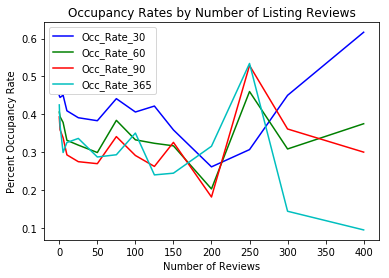

In [13]:
# Chart Building
plt.plot(bucket[0:14], df_B1['Occ_Rate_30'], color='b')
plt.plot(bucket[0:14], df_B1['Occ_Rate_60'], color='g')
plt.plot(bucket[0:14], df_B1['Occ_Rate_90'], color='r')
plt.plot(bucket[0:14], df_B1['Occ_Rate_365'], color='c')

plt.xlabel("Number of Reviews")
plt.ylabel("Percent Occupancy Rate")

plt.title('Occupancy Rates by Number of Listing Reviews')
plt.legend()

plt.show()

#### Discussion: Occupany Rates by Number of Listing Reviews

I honestly thought there would be more of a correlation here between the 2 variables - I thought having more reviews would lead to having a better pipeline.  It seems there is an outlier from the "U" shape around the 250 review mark, which may end up being a single awesome unit that was featured at one point or another.  

What is interesting to me though is that the 4 lines follow roughly the same pattern AND almost always have a higher occupancy rate for the shorter timeframes.  This makes ense to me as people would have last minute bookings or spur of the moment trips that they may not plan for 90 days in advance.  

It runs counter to my assumption that more reviews returns better occupancy rates, when in fact the graph shows that until a certain point it seems more reviews lead to LESS bookings.  It may be that there is a relationship between number of reviews and inflated listing prices, which could drop appeal to a potential renter.  I could also incorporate the average score of the reviews and take that variable into consideration.  This could be a focus of a follow up investigation.  

In [14]:
## B3 Section

# DF Manipulation
df_B2 = df_B.copy()
df_B2.drop(['calendar_updated', 'availability_30', 'availability_60', 'availability_90', 
            'availability_365', 'number_of_reviews'], axis='columns', inplace=True)
df_B2 = df_B2.groupby('cancellation_policy').mean().reset_index()
B2_policy = df_B2.cancellation_policy.unique()

In [17]:
df_B2.head()

,cancellation_policy,Occ_Rate_30,Occ_Rate_60,Occ_Rate_90,Occ_Rate_365
0,flexible,0.470833,0.399775,0.363851,0.339374
1,moderate,0.429814,0.357337,0.318127,0.344938
2,strict,0.387127,0.323668,0.290470,0.321740


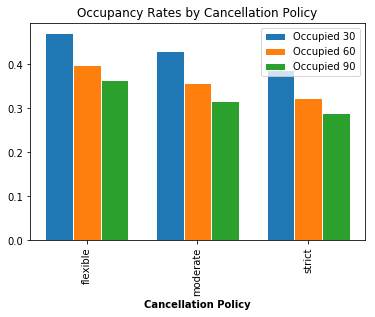

In [29]:
# Chart Building
barWidth = 0.25

bars1 = df_B2.Occ_Rate_60
bars2 = df_B2.Occ_Rate_90
bars3 = df_B2.Occ_Rate_30

r1 = np.arange(len(bars1))
r2 = [x + (barWidth) for x in r1]
r3 = [x - (barWidth) for x in r1]

plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='Occupied 30')
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='Occupied 60')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='Occupied 90')

plt.xlabel('Cancellation Policy', fontweight='bold')
plt.xticks([r  for r in range(len(bars1))], B2_policy, rotation='vertical')

plt.title("Occupancy Rates by Cancellation Policy")
plt.legend()

plt.show()

#### Discussion: Occupany Rates by Number of Listing Reviews

These results run true to my hypothesis that having a more flexible cancellation policy yields a higher expected occupancy rate.  However, let's consider the impact to pipeline health here; If the goal is to have more bookings in advance so that you know there will be revenue coming in, sacrificing that security to get those bookings may not work in your favor.  

Consider the following scenario: 

You may have 20 nights booked over the next 30 days at your listing, but if 8 are cancelled at the last minute then you end up with unexpected gaps in your calendar.  Opposite that, your friend who has a stricter policy only has 10 nights booked over the next 30 days, but only 2 cancel. Your friend has a much better idea of when renters are coming to their listing AND still makes money off the cancellations.  

Each scenario has pros and cons.  More bookings should yield more revenue, but those bookings are slightly more risky.  Less bookings that are more secure could lead to less revenue, but more security around that revenue.  Depending on your financial plans and calendar flexibility, you can decide what makes more sense for you.  

## Final Thoughts

RESULTS EVALUATION:

Any host working with AirBnB will have different goals and motivations for why they are listing a unit.  Maybe they want to make some extra money on the side with their family home after kids move out.  Maybe someone has a number of properties and is trying to fill long-term vacancies with some shorter stays.  Whatever their motivation, my goal with this analysis was to help prospective or current AirBnB hosts understand more about their listings and how certain decisions can affect overall revenue. 

Overall I was pretty happy with my results and code on this project.  There are definitely other avenues to pursue, both as follow up business questions and some more advanced python techniques to discover:

1) Parse out the listing amenities and do some analysis on those as binary (does the unit have Internet? Parking? etc)
2) Delve deeper into how reviews affect occupancy rates.  Do qunatitative scores have a correlation? Can I build a matrix of Positive/Negative Reviews and Deviation from Avg. Neighbourhood Price to Occupancy Rates.  
3) Do more experienced hosts get more reviews? Do they get more bookings?